In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Dictionnaires des URLs vers les fichiers CSV pour chaque campagne
url_doses = {
    "2021‑2022": "https://www.data.gouv.fr/api/1/datasets/r/d1a7a9c8-da2a-4840-be4e-720b4703462c",  # à compléter
    "2022‑2023": "https://www.data.gouv.fr/api/1/datasets/r/1339c744-6b09-4a21-a5a0-6f56200f7208",
    "2023‑2024": "https://www.data.gouv.fr/api/1/datasets/r/dccbba26-bf9a-4d30-8249-5a539354e69b",
    "2024‑2025": "https://www.data.gouv.fr/api/1/datasets/r/a6f6c78f-96eb-41e5-8c8e-54c2bcbbe3f2"
}

url_couverture = {
    "2021‑2022": "https://www.data.gouv.fr/api/1/datasets/r/70f1cfba-569c-46fd-aa0d-2bc890a42eb5",
    "2022‑2023": "https://www.data.gouv.fr/api/1/datasets/r/c36e85ef-077e-465e-b3e4-e218d972f45e",
    "2023‑2024": "https://www.data.gouv.fr/api/1/datasets/r/1b5339fe-47b9-4d29-9be6-792ac20e392b",
    "2024‑2025": "https://www.data.gouv.fr/api/1/datasets/r/848e3e48-4971-4dc5-97c7-d856cdfde2f6"
}

url_campagne = {
    "2021‑2022": "https://www.data.gouv.fr/api/1/datasets/r/b4867c67-70c9-459f-a88d-859996e8098b",
    "2022‑2023": "https://www.data.gouv.fr/api/1/datasets/r/992e690a-0c9c-4457-a556-3d70b4af29e8",
    "2023‑2024": "https://www.data.gouv.fr/api/1/datasets/r/40314f2c-12ea-4f4c-a3a2-855bab16e6dd",
    "2024‑2025": "https://www.data.gouv.fr/api/1/datasets/r/c26a4606-b6a5-49a9-ad18-89cc0e1fc8c2"
}

def charger_depuis_url(url_dict):
    dfs = []
    for campagne, url in url_dict.items():
        try:
            print(f"Chargement de la campagne {campagne} depuis {url}")
            df = pd.read_csv(url)
            df["campagne"] = campagne
            dfs.append(df)
        except Exception as e:
            print(f"Erreur avec la campagne {campagne}, URL {url} : {e}")
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

# Charger les trois types de jeux de données
doses_actes_all = charger_depuis_url(url_doses)
couverture_all = charger_depuis_url(url_couverture)
campagne_all = charger_depuis_url(url_campagne)

# Vérification rapide
print("✅ Résultats du chargement :")
print("Doses/Actes – lignes :", doses_actes_all.shape[0], "colonnes :", doses_actes_all.shape[1])
print("Couverture – lignes :", couverture_all.shape[0], "colonnes :", couverture_all.shape[1])
print("Campagne – lignes :", campagne_all.shape[0], "colonnes :", campagne_all.shape[1])


Chargement de la campagne 2021‑2022 depuis https://www.data.gouv.fr/api/1/datasets/r/d1a7a9c8-da2a-4840-be4e-720b4703462c
Chargement de la campagne 2022‑2023 depuis https://www.data.gouv.fr/api/1/datasets/r/1339c744-6b09-4a21-a5a0-6f56200f7208
Chargement de la campagne 2023‑2024 depuis https://www.data.gouv.fr/api/1/datasets/r/dccbba26-bf9a-4d30-8249-5a539354e69b
Chargement de la campagne 2024‑2025 depuis https://www.data.gouv.fr/api/1/datasets/r/a6f6c78f-96eb-41e5-8c8e-54c2bcbbe3f2
Chargement de la campagne 2021‑2022 depuis https://www.data.gouv.fr/api/1/datasets/r/70f1cfba-569c-46fd-aa0d-2bc890a42eb5
Chargement de la campagne 2022‑2023 depuis https://www.data.gouv.fr/api/1/datasets/r/c36e85ef-077e-465e-b3e4-e218d972f45e
Chargement de la campagne 2023‑2024 depuis https://www.data.gouv.fr/api/1/datasets/r/1b5339fe-47b9-4d29-9be6-792ac20e392b
Chargement de la campagne 2024‑2025 depuis https://www.data.gouv.fr/api/1/datasets/r/848e3e48-4971-4dc5-97c7-d856cdfde2f6
Chargement de la campagn

In [ ]:
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departements = gpd.read_file(url)

In [ ]:
couverture_all['code'] = couverture_all['code'].astype(str)


In [ ]:
merged = departements.merge(couverture_all, left_on='code', right_on='code', how='right')

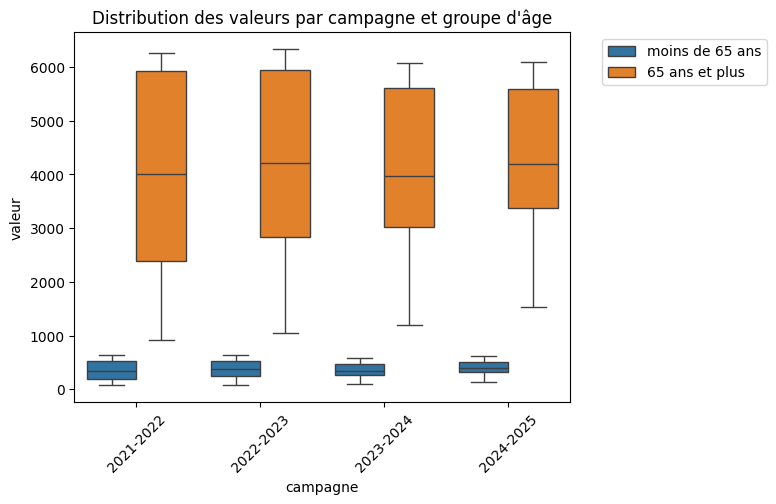

In [ ]:
import seaborn as sns

# Visualisation des distributions des valeurs pour chaque campagne et groupe d'âge
sns.boxplot(x='campagne', y='valeur', hue='groupe', data=merged)
plt.title("Distribution des valeurs par campagne et groupe d'âge")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.show()

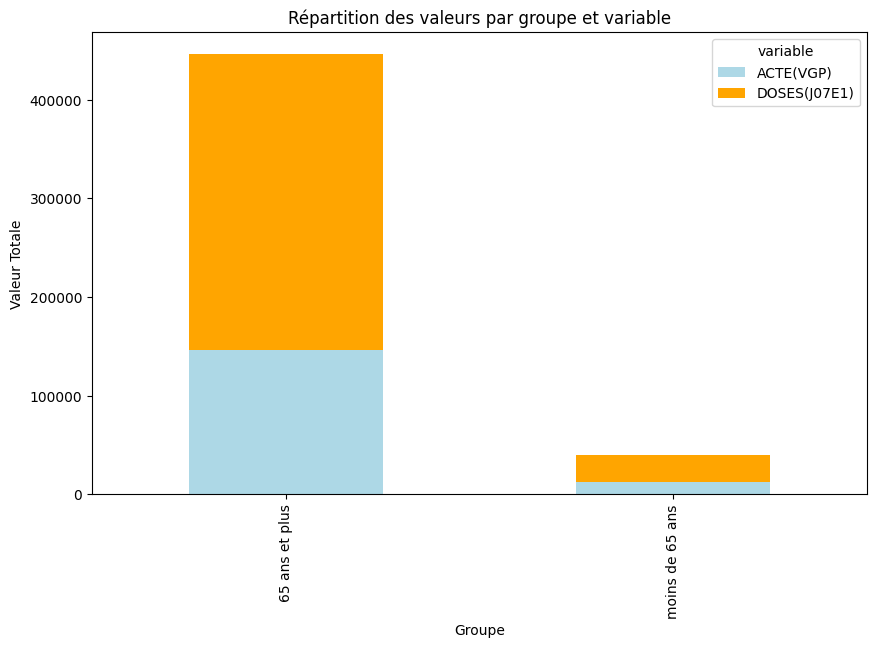

In [ ]:
# Aggréger les valeurs par groupe et variable
group_variable_values = merged.groupby(['groupe', 'variable'])['valeur'].sum().unstack()

# Tracer un graphique en barres empilées
group_variable_values.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])
plt.title("Répartition des valeurs par groupe et variable")
plt.xlabel("Groupe")
plt.ylabel("Valeur Totale")
plt.show()


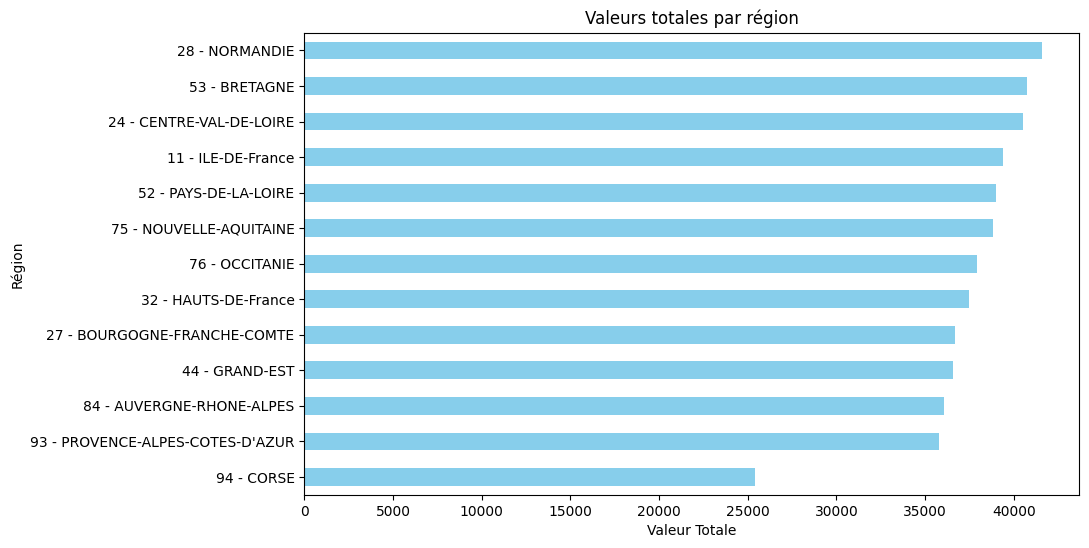

In [ ]:
# Calculer la somme des valeurs par région
region_values = merged.groupby('region')['valeur'].sum().sort_values()

# Créer un graphique en barres
region_values.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Valeurs totales par région")
plt.xlabel("Valeur Totale")
plt.ylabel("Région")
plt.show()


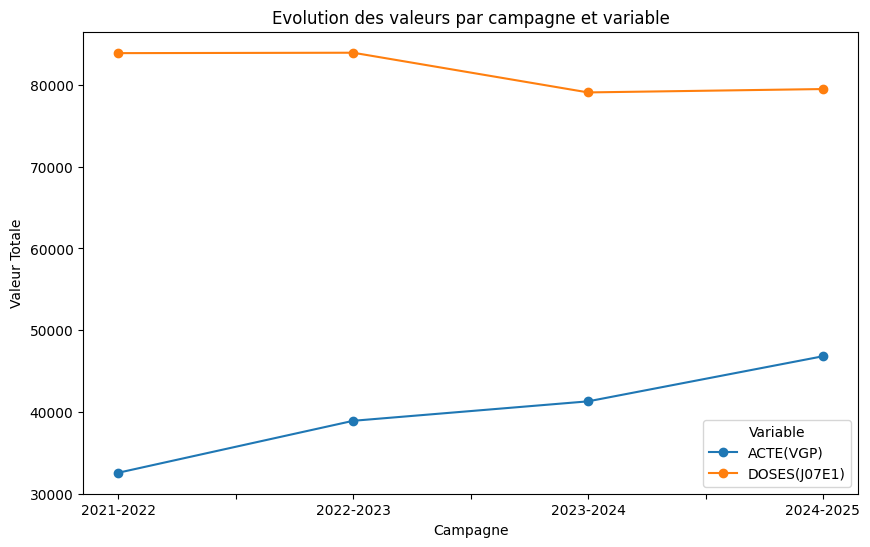

In [ ]:
# Aggréger les valeurs par campagne et variable
campaign_trends = merged.groupby(['campagne', 'variable'])['valeur'].sum().unstack()

# Tracer un graphique linéaire
campaign_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Evolution des valeurs par campagne et variable")
plt.xlabel("Campagne")
plt.ylabel("Valeur Totale")
plt.legend(title='Variable')
plt.show()


In [ ]:
filtered_doses_actes = doses_actes_all[doses_actes_all['variable'].isin(['ACTE(VGP)', 'DOSES(J07E1)'])]
aggregated_doses_actes = filtered_doses_actes.groupby(['date', 'variable', 'groupe', 'campagne'])['valeur'].sum().reset_index()
display(aggregated_doses_actes.head())
aggregated_doses_actes.info()

,date,variable,groupe,campagne,valeur
0,2020-10-13,ACTE(VGP),65 ans et plus,2021‑2022,296119
1,2020-10-13,ACTE(VGP),moins de 65 ans,2021‑2022,75969
2,2020-10-13,DOSES(J07E1),65 ans et plus,2021‑2022,1685461
3,2020-10-13,DOSES(J07E1),moins de 65 ans,2021‑2022,479784
4,2020-10-14,ACTE(VGP),65 ans et plus,2021‑2022,242598


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      4172 non-null   object
 1   variable  4172 non-null   object
 2   groupe    4172 non-null   object
 3   campagne  4172 non-null   object
 4   valeur    4172 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 163.1+ KB


In [ ]:
aggregated_doses_actes['date'] = pd.to_datetime(aggregated_doses_actes['date'])
aggregated_doses_actes['day_of_week'] = aggregated_doses_actes['date'].dt.dayofweek
aggregated_doses_actes['month'] = aggregated_doses_actes['date'].dt.month
aggregated_doses_actes['year'] = aggregated_doses_actes['date'].dt.year
display(aggregated_doses_actes.head())

,date,variable,groupe,campagne,valeur,day_of_week,month,year
0,2020-10-13,ACTE(VGP),65 ans et plus,2021‑2022,296119,1,10,2020
1,2020-10-13,ACTE(VGP),moins de 65 ans,2021‑2022,75969,1,10,2020
2,2020-10-13,DOSES(J07E1),65 ans et plus,2021‑2022,1685461,1,10,2020
3,2020-10-13,DOSES(J07E1),moins de 65 ans,2021‑2022,479784,1,10,2020
4,2020-10-14,ACTE(VGP),65 ans et plus,2021‑2022,242598,2,10,2020


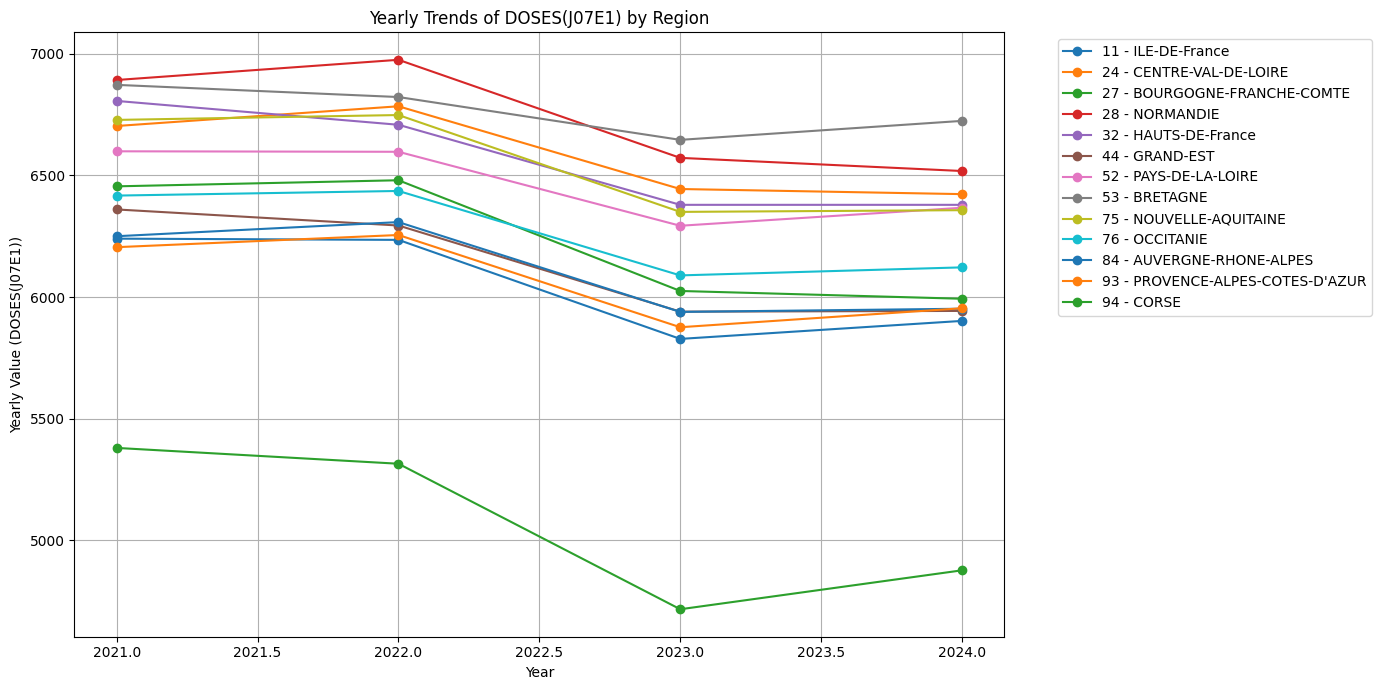

In [ ]:
# Filter merged data for DOSES(J07E1)
doses_j07e1_regional = merged[merged['variable'] == 'DOSES(J07E1)']

# Aggregate by region and year
doses_j07e1_regional_yearly = doses_j07e1_regional.groupby(['region', doses_j07e1_regional['campagne']])['valeur'].sum().reset_index()

# Extract year from campagne for plotting
doses_j07e1_regional_yearly['year'] = doses_j07e1_regional_yearly['campagne'].str.extract(r'(\d{4})').astype(int)


# Plot the yearly trends for each region
plt.figure(figsize=(14, 7))
for region in doses_j07e1_regional_yearly['region'].unique():
    region_data = doses_j07e1_regional_yearly[doses_j07e1_regional_yearly['region'] == region]
    plt.plot(region_data['year'], region_data['valeur'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('Yearly Value (DOSES(J07E1))')
plt.title('Yearly Trends of DOSES(J07E1) by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

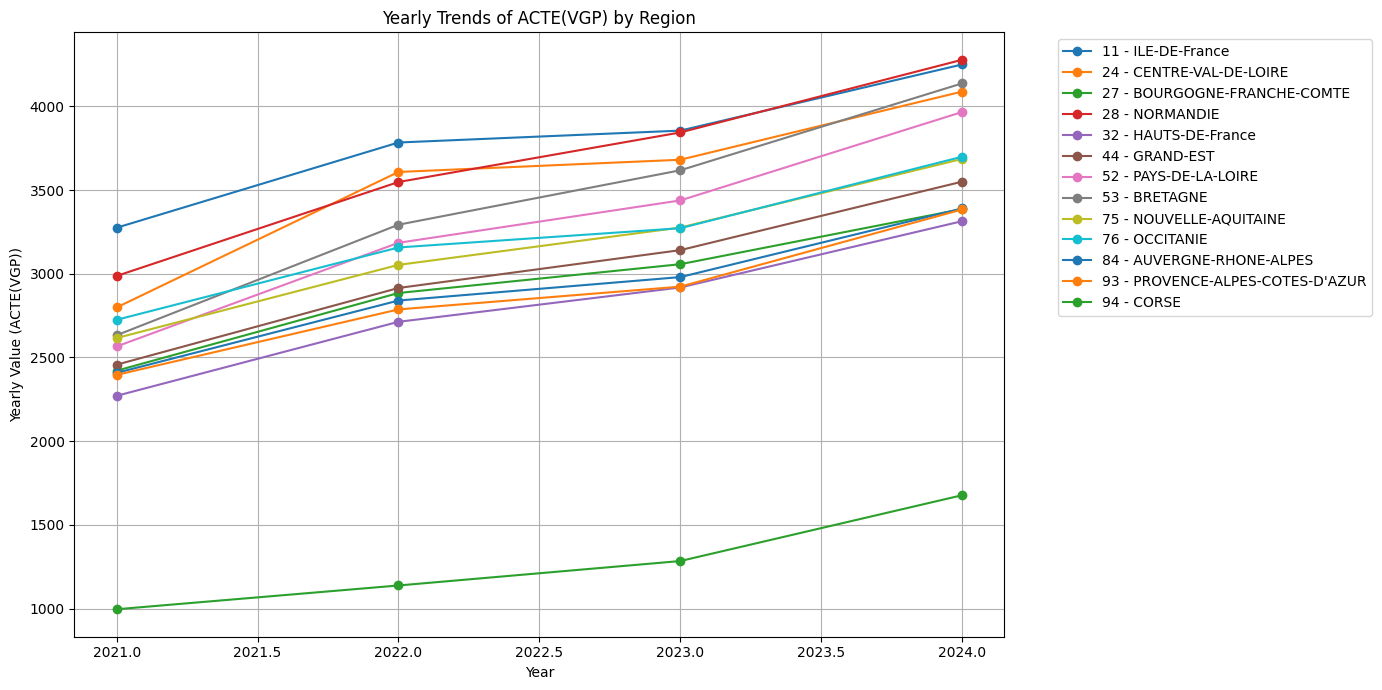

In [ ]:
# Filter merged data for ACTE(VGP)
actes_vgp_regional = merged[merged['variable'] == 'ACTE(VGP)']

# Aggregate by region and year
actes_vgp_regional_yearly = actes_vgp_regional.groupby(['region', actes_vgp_regional['campagne']])['valeur'].sum().reset_index()

# Extract year from campagne for plotting
actes_vgp_regional_yearly['year'] = actes_vgp_regional_yearly['campagne'].str.extract(r'(\d{4})').astype(int)

# Plot the yearly trends for each region
plt.figure(figsize=(14, 7))
for region in actes_vgp_regional_yearly['region'].unique():
    region_data = actes_vgp_regional_yearly[actes_vgp_regional_yearly['region'] == region]
    plt.plot(region_data['year'], region_data['valeur'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('Yearly Value (ACTE(VGP))')
plt.title('Yearly Trends of ACTE(VGP) by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()